In [48]:
import numpy as np # for linear algebra
import pandas as pd # for data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # to plot data visualization charts
from collections import Counter
import os
# Modeling Libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split
from sklearn.svm import SVC

In [49]:
from google.colab import files
bhar=files.upload()

Saving diabetes_prediction_dataset.csv to diabetes_prediction_dataset (1).csv


In [51]:
dataset=pd.read_csv("diabetes_prediction_dataset.csv")

In [52]:
df=pd.DataFrame(dataset)

In [53]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [54]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [56]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [57]:
for i in range(len(df['gender'])):
  if(df['gender'][i]=='Female'):
    df['gender'][i]=1
  else:
     df['gender'][i]=0

<ipython-input-57-6abae2cddae4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'][i]=1
<ipython-input-57-6abae2cddae4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gender'][i]=0


In [58]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,never,25.19,6.6,140,0
1,1,54.0,0,0,No Info,27.32,6.6,80,0
2,0,28.0,0,0,never,27.32,5.7,158,0
3,1,36.0,0,0,current,23.45,5.0,155,0
4,0,76.0,1,1,current,20.14,4.8,155,0


In [59]:
for i in range(len(df['smoking_history'])):
  if(df['smoking_history'][i]=='current'):
    df['smoking_history'][i]=1
  elif(df['smoking_history'][i]=='never'):
     df['smoking_history'][i]=0
  else:
     df['smoking_history'][i]=0

<ipython-input-59-8b2d9edc2b2a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoking_history'][i]=0
<ipython-input-59-8b2d9edc2b2a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoking_history'][i]=0
<ipython-input-59-8b2d9edc2b2a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoking_history'][i]=1


<Axes: xlabel='diabetes', ylabel='count'>

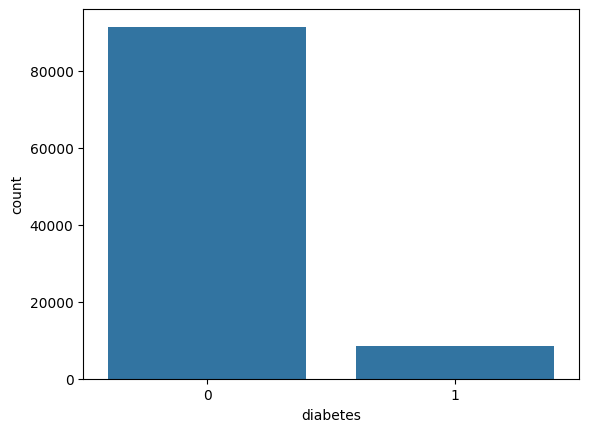

In [60]:
sns.countplot(x = 'diabetes',data = df)

In [61]:
X=df.drop(['diabetes'],axis=1)
Y=df['diabetes']


In [62]:
print(X.head())

  gender   age  hypertension  heart_disease smoking_history    bmi  \
0      1  80.0             0              1               0  25.19   
1      1  54.0             0              0               0  27.32   
2      0  28.0             0              0               0  27.32   
3      1  36.0             0              0               1  23.45   
4      0  76.0             1              1               1  20.14   

   HbA1c_level  blood_glucose_level  
0          6.6                  140  
1          6.6                   80  
2          5.7                  158  
3          5.0                  155  
4          4.8                  155  


In [63]:
print(Y.head())

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64


In [64]:
print(X.shape)
print(Y.shape)


(100000, 8)
(100000,)


In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 4)

In [66]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (80000, 8)
X_test shape: (20000, 8)
Y_train shape: (80000,)
Y_test shape: (20000,)


In [67]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [80]:
from sklearn.feature_extraction.text  import TfidfVectorizer

In [81]:
feature_extract=TfidfVectorizer()

In [68]:
model=svm.SVC(kernel='linear')
model.fit(X_train, Y_train)

SVC(kernel='linear')

In [70]:
x_train_prediction=model.predict(X_train)
training_accuracy=accuracy_score(x_train_prediction,Y_train)

In [71]:
print(training_accuracy)

0.96005


In [72]:
x_test_predict=model.predict(X_test)

In [73]:
print(x_test_predict)

[0 0 0 ... 0 0 0]


In [ ]:
pip install gradio

In [105]:
import gradio as gr

In [106]:

def func(Gender,Age,Hypertension,Heart_disease,Smoking_history, BMI, Hemoglobin_A1c,Blood_Glucose_Level):
   if(Gender=="Female"):
     gender=1
   else:
     gender=0

   if(Smoking_history=="current"):
     smoking_history=1
   else:
     smoking_history=0
   features = [[gender, Age, Hypertension, Heart_disease, smoking_history, BMI, Hemoglobin_A1c, Blood_Glucose_Level]]

   prediction=model.predict( features )
   string1="No diabetes"
   string2="You have Diabetes"
 # return [str(prediction)]
   if(prediction[0]==0):
     return [string1]
   else:
     return [string2]
func('female',40,0,1,"never",22.2,6.7,200)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


['No diabetes']

In [ ]:
pip install gradio --upgrade

In [122]:

iface = gr.Interface(func,
                     ["text","text","text","text","text","text","text","text"],
                     "text")

In [123]:
iface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://df78de8bda463bc45c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
